In [ ]:
import pandas as pd
import skimage
import numpy as np
# import json
df = pd.read_json("../../Zone_2000.json")

In [ ]:
import xml.etree.ElementTree as ET

tree = ET.parse("fodomust_clusturing.xml")
root = tree.getroot()

In [ ]:
x = np.array([0])

In [ ]:
type(x)

In [ ]:
tab_test = []
tab = []
nb_cluster = 0
h = 1
for i in root:
    if (i.tag == 'classes'):
        for j in i:
            print(j.tag, j.attrib)
            nb_cluster = nb_cluster +1
    elif (i.tag == 'values'):
        for k in range(len(i)) :
            tab_test.append(i[k].text)
            if((k+1) % 140 == 0) :
                tab.append(tab_test)
                tab_test = []

In [ ]:
tab = np.array(tab)

In [ ]:
labels, num = skimage.measure.label(tab, background=-1, return_num= True, connectivity=2)
#labels[x][y] contient un entier représentant le numéros de l'objet.
labels[0][7]

In [ ]:
labels[0][1]

In [ ]:
regions = skimage.measure.regionprops(labels)


In [ ]:
for i in regions:
    print(i.label,"\n", i.coords,"\n")

In [ ]:
len(regions)

In [ ]:
for i in regions:
    for j in i.coords:
        print(j[0])

In [ ]:
def classes(tab, nb_cluster):
    tab_cluster = []
    for i in range(nb_cluster):
        tab_cluster.append([])
    for i in range(len(tab)):
        for j in range(len(tab[i])):
            tab_cluster[int(tab[i][j])].append((i,j))
    
    return tab_cluster


In [ ]:
def voisin(tab1,tab2):
    if (abs(tab1[0] - tab2[0]) <=1 ) & (abs(tab1[1] - tab2[1]) <=1 ):
        return True
    else:
        return False

In [ ]:
print(voisin([0,0],[0,2]))
print(voisin([0,0],[1,0]))
print(voisin([0,0],[1,1]))

## A FINIR PLUS TARD !

In [ ]:
def cluster_to_object(tab_cluster):
    tab_object = []
    for i in range(len(tab_cluster)):
        exec = 0
        obj_1 = [i,[tab_cluster[i][0]]]
        for j in range(1, len(tab_cluster[i]), 1):
            print("i j :",i,j,voisin([i,0],tab_cluster[i][j]))

In [ ]:
# xo = [[0,0,1,2,2],[0,0,2,1,2],[2,1,1,2,2],[0,0,1,2,1]]
# print(classes(xo, 3))
# cluster_to_object(classes(xo, 3))

In [ ]:
from owlready2 import *
import os
onto = get_ontology("http://test.org/onto_herelles.owl")

### Image Module
class Image(Thing):
    namespace=onto
class Elements(Thing):
    namespace=onto
class Pixel(Elements):
    pass
class Object_Geo(Elements):
    pass

### Evolution Module
class Evolution_Process(Thing):
    namespace=onto
class Pixel_Evolution_Process(Evolution_Process):
    pass
class ObjGeo_Evolution_Process(Evolution_Process):
    pass

### Temporal Module
class Valid_Time(Thing):
    namespace=onto
class Valid_Instant(Valid_Time):
    pass
class Valid_Interval(Valid_Time):
    pass

### Herelles Module
class State_Geo(Thing):
    namespace=onto

class Surface_artificialisee(State_Geo):
    pass
class Vegetation_urbaine(Surface_artificialisee):
    pass
class Arbre_urbain(Vegetation_urbaine):
    pass
class Pelouse(Vegetation_urbaine):
    pass
class Jardin(Vegetation_urbaine):
    pass
class Parc(Vegetation_urbaine):
    pass
class Alignement_darbres_urbain(Vegetation_urbaine):
    pass
class Ensemble_darbres_urbain(Vegetation_urbaine):
    pass
class Bati(Surface_artificialisee):
    pass
class Bati_residentiel(Bati):
    pass
class TU_discontinu(Bati_residentiel):
    pass
class TU_discontinu_collectif(TU_discontinu):
    pass
class TU_discontinu_individuel(TU_discontinu):
    pass
class TU_continu(Bati_residentiel):
    pass
class TU_continu_collectif(TU_continu):
    pass
class TU_continu_individuel(TU_continu):
    pass
class Bati_activite(Bati):
    pass
class Zone_industrielle_commerciale_ou_tertiaire(Bati_activite):
    pass
class Bâtiment_rural(Bati_activite):
    pass
class Serre(Bati_activite):
    pass
class Autre_Bati(Bati):
    pass
class Infrastructure_de_transport(Surface_artificialisee):
    pass
class Voies_de_communication(Infrastructure_de_transport):
    pass
class Route(Voies_de_communication):
    pass
class Chemin(Voies_de_communication):
    pass
class Chemin_de_fer(Voies_de_communication):
    pass
class Route_Grande_Vitesse(Voies_de_communication):
    pass
class Autre_Route(Voies_de_communication):
    pass
class Equipement_transports(Infrastructure_de_transport):
    pass
class Parking(Equipement_transports):
    pass
class Zone_aeroportuaire(Equipement_transports):
    pass
class Ilot_de_circulation(Equipement_transports):
    pass
class Carrefour(Equipement_transports):
    pass
class Pont(Equipement_transports):
    pass
class Echangeur(Equipement_transports):
    pass
class Autre_artificialisation(Surface_artificialisee):
    pass
class Cimetiere(Autre_artificialisation):
    pass
class Place(Autre_artificialisation):
    pass
class Terrain_vacant(Autre_artificialisation):
    pass
class Terrain_de_Sport(Autre_artificialisation):
    pass
class Piscine_exterieure(Autre_artificialisation):
    pass
class Zone_sportif_loisir(Autre_artificialisation):
    pass
class Zone_dextraction(Autre_artificialisation):
    pass

class Eau(State_Geo):
    pass
class Surface_en_eau_artificielle(Eau):
    pass
class Canal(Surface_en_eau_artificielle):
    pass
class Bassin_artificiel(Surface_en_eau_artificielle):
    pass
class Surface_en_eau_naturelle(Eau):
    pass
class Etendue_deau(Surface_en_eau_naturelle):
    pass
class Cours_deau(Surface_en_eau_naturelle):
    pass

class Espaces_agricoles(State_Geo):
    pass
class Parcelle_agricole(Espaces_agricoles):
    pass
class Vigne(Parcelle_agricole):
    pass
class Autres_cultures(Parcelle_agricole):
    pass
class Surface_herbeuse_agricole(Parcelle_agricole):
    pass
class Element_boise_agricole(Espaces_agricoles):
    pass
class Groupe_darbres_agricole_sylviculture(Element_boise_agricole):
    pass
class Alignement_darbres_agricole(Element_boise_agricole):
    pass
class Verger(Element_boise_agricole):
    pass
class Autre_vegetation_agricole(Espaces_agricoles):
    pass
class Haie(Autre_vegetation_agricole):
    pass

class Espaces_forestiers_et_naturels(State_Geo):
    pass
class Foret(Espaces_forestiers_et_naturels):
    pass
class Espace_libre_naturel(Espaces_forestiers_et_naturels):
    pass
class Sable(Espace_libre_naturel):
    pass
class Zones_humides(Espaces_forestiers_et_naturels):
    pass
class Vegetation_autre(Espaces_forestiers_et_naturels):
    pass
class Surface_herbeuse_naturelle(Vegetation_autre):
    pass

### Object properties
class composed_by(ObjectProperty, InverseFunctionalProperty, IrreflexiveProperty):
    namespace=onto
    domain    = [Image]
    range     = [Elements]
class has_pixels(ObjectProperty, InverseFunctionalProperty, IrreflexiveProperty):
    namespace=onto
    domain    = [Object_Geo]
    range     = [Pixel]
class has_state(ObjectProperty, IrreflexiveProperty):
    namespace=onto
    domain    = [Elements]
    range     = [State_Geo]
class is_involved(ObjectProperty):
    namespace=onto
    domain    = [Elements]
    range     = [Evolution_Process]
class has_duration(ObjectProperty):
    namespace=onto
    domain    = [Evolution_Process]
    range     = [Valid_Time]
class has_time(ObjectProperty, FunctionalProperty, IrreflexiveProperty):
    namespace=onto
    domain    = [State_Geo]
    range     = [Valid_Time]

### ajout de la classe Zone :
class Zone(Elements):
    namespace=onto

class ZoneEau(Zone):
    pass

class ZoneEA(Zone):
    pass

class ZoneArticle1(Zone):
    pass

class Zone_Z2(Zone):
    pass

class ZoneSA(Zone):
    pass

# ajout de relation pour cette derniere :
class has_rules(ObjectProperty, InverseFunctionalProperty, IrreflexiveProperty):
    namespace=onto
    domain    = [Image]
    range     = [Zone]

class z_has_pixels (ObjectProperty, IrreflexiveProperty):
    namespace=onto
    domain    = [Zone]
    range     = [Pixel]

class Candidate_Final_State(ObjectProperty, IrreflexiveProperty):
    namespace=onto
    domain    = [Elements]
    range     = [State_Geo]

class is_in(ObjectProperty, IrreflexiveProperty):
    namespace=onto
    domain    = [Object_Geo]
    range     = [Zone]

class contains_object(ObjectProperty,  IrreflexiveProperty):
    namespace=onto
    domain    = [Zone]
    range     = [Object_Geo]
    inverse_property = is_in

class is_pixel_of_zone(ObjectProperty, IrreflexiveProperty):
    namespace=onto
    domain    = [Pixel]
    range     = [Zone]
    inverse_property = z_has_pixels

class is_pixel_of(ObjectProperty, FunctionalProperty, IrreflexiveProperty):
    namespace=onto
    domain    = [Pixel]
    range     = [Object_Geo]
    inverse_property = has_pixels


class hasPostitionX(DataProperty):
    namespace=onto
    domain = [Pixel]
    range= [int]

class hasPostitionY(DataProperty):
    namespace=onto
    domain    = [Pixel]
    range     = [int]

class hasValueClust(DataProperty):
    namespace=onto
    domain    = [Pixel]
    range     = [int]

class is_Neighbor_Of(ObjectProperty, SymmetricProperty):
    namespace=onto
    domaine   = [Object_Geo]
    range     = [Object_Geo]

### Obstacle :
class Obstacle(Thing):
    namespace = onto

class Ecoulement_des_crues(Obstacle):
    pass

class Remblais(Obstacle):
    pass

class createSome(ObjectProperty, IrreflexiveProperty):
    namespace=onto
    domain    = [State_Geo]
    range     = [Obstacle]


'''
### Extractions des données et insertion dans l'ontologie
'''
Bati_indu = Zone_industrielle_commerciale_ou_tertiaire("bati_industrielle")
jardin = Jardin("jardin_1")

k = 0
k2 = 0
tab_obj = []
for i in regions:
    print(i)
    px_tab = []
    for j in i.coords:
        str_pixel = "Px_" + str(k)
        x = int(j[0])
        y = int(j[1])
        val = tab[x][y]
        px = Pixel(str_pixel, hasPostitionX = [x], hasPostitionY = [y], hasValueClust = [int(val)])
        px_tab.append(px)
        k = k+1
    str_obj = "obj_" + str(k2)
    obj1 = Object_Geo(str_obj, has_pixels = px_tab, Candidate_Final_State = [jardin])
    tab_obj.append(obj1)
    k2 = k2+1

z1 = ZoneArticle1("zone_1", contains_object = tab_obj)

img_1 = Image("Img", composed_by = tab_obj)
img_2 = Image("Img2", has_rules= [z1])

'''
### Exemple_1: 2 Objets appartiennent a 1 seul Zone ## Quelques problemes avec les concepts Remblais et Crue
'''
# ### Valid_time :
# t1 = Valid_Time("t1")
# remblais1 = Remblais("remblais1")
# crues1 = Ecoulement_des_crues("crues1")

# ### State_geo : (Jardin et Vigne)
# jardin = Jardin("jardin_1", has_time = t1, createSome = [remblais1])
# eau = Eau("eau_1", has_time = t1)
# Bati_indu = Zone_industrielle_commerciale_ou_tertiaire("bati_industrielle", has_time = t1)
# EA = Espaces_agricoles("EA_1", has_time = t1)

# ### Object_geo with his pixel :
# px1 = Pixel("Px_1", has_state = [Bati_indu])
# px2 = Pixel("Px_2", has_state = [EA])

# #L'un OU l'autre :
# obj1 = Object_Geo("obj_1", has_pixels = [px1], has_state = [eau], Candidate_Final_State = [jardin]) #createSome = [remblais1]
# obj2 = Object_Geo("obj_2", has_pixels = [px2], has_state = [Bati_indu], Candidate_Final_State = [jardin]) #createSome = [crues1]
# # obj1 = Object_Geo("obj_1", has_pixels = [px1], has_state = [Bati_indu], Candidate_Final_State = [Bati_indu])
# # obj2 = Object_Geo("obj_2", has_pixels = [px2], has_state = [EA], Candidate_Final_State = [Bati_indu])

# ### Zone :
# z1 = ZoneArticle1("zone_1", z_has_pixels = [px1], contains_object = [obj1])
# z2 = Zone_Z2("zone_2", z_has_pixels = [px2], contains_object = [obj2])

# ### Image creation :
# img_1 = Image("Img", composed_by = [obj1, obj2])
# img_2 = Image("Img2", has_rules= [z1,z2])

'''
### Exemple_2: 1 Objet appartient a 2 Zones différentes
# Dans l'exemple ci dessous : 
# - si on change la Candidate_Final_State de l'objet en "Bati_indu" -> inconsistance (car z1 = zonearticle)
# - si on change la Candidate_Final_State de l'objet en "eau" -> inconsistance (car (z2 = Zone Candidate_Final_State a Espace_Agricole))
'''
# t1 = Valid_Time("t1")
# Bati_indu = Zone_industrielle_commerciale_ou_tertiaire("bati_industrielle", has_time = t1)
# bati_act = Bati_activite("bati_act", has_time = t1)
# EA = Espaces_agricoles("EA_1", has_time = t1)
# EA2 = Espaces_agricoles("EA_2", has_time = t1)

# # Pixel
# px1 = Pixel("Px_1", has_state = [Bati_indu])
# px2 = Pixel("Px_2", has_state = [Bati_indu])

# # Object
# obj1 = Object_Geo("obj_1", has_pixels = [px1,px2], has_state = [Bati_indu], Candidate_Final_State = [Bati_indu])

# ### Zone
# z1 = ZoneArticle1("zone_1", z_has_pixels = [px1], contains_object = [obj1])
# z2 = ZoneEA("zone_2", z_has_pixels = [px2], Candidate_Final_State = [EA], contains_object = [obj1])
# # z1 = ZoneArticle1("zone_1", z_has_pixels = [px1])
# # z2 = ZoneEA("zone_2", z_has_pixels = [px2], Candidate_Final_State = [EA])

# ### Image creation :
# img_1 = Image("Img", composed_by = [obj1])
# img_2 = Image("Img2", has_rules= [z1,z2])

'''
### Exemple_3: 2 objects, chacun dans 2 zones : 

# Dans l'exemple ci-dessous : si on change la Candidate_Final_State de n'importe lequel des 2 objects, alors nous avons une inconsistance :
# - si on change Candidate_Final_State en bati_indu -> inconsistance 
# - si on change Candidate_Final_State en "eau" -> inconsistance
# - D'ailleurs EA fonctionne car 1 Zone interdit les bati_indu mais pas les EA, et l'autre Oblige d'avor des EA.
'''
# t1 = Valid_Time("t1")
# t2 = Valid_Time("t2")
# jardin = Jardin("jardin_1", has_time = t1)
# eau = Eau("eau_1", has_time = t1)
# Bati_indu1 = Zone_industrielle_commerciale_ou_tertiaire("bati_industrielle1", has_time = t1)
# Bati_indu2 = Zone_industrielle_commerciale_ou_tertiaire("bati_industrielle2", has_time = t2)
# EA = Espaces_agricoles("EA_1", has_time = t1)
# SA_1 = Surface_artificialisee("SA_1", has_time = t1)

# # Pixel :
# px1 = Pixel("Px_1", has_state = [Bati_indu1])
# px2 = Pixel("Px_2", has_state = [Bati_indu2])
# px3 = Pixel("Px_3", has_state = [EA])
# px4 = Pixel("Px_4", has_state = [EA])

# # Object :
# obj1 = Object_Geo("obj_1", has_pixels = [px1,px2], has_state = [Bati_indu1], Candidate_Final_State = [Bati_indu1])
# obj2 = Object_Geo("obj_2", has_pixels = [px3,px4], has_state = [Bati_indu2], Candidate_Final_State = [Bati_indu2])


# ### Zone :
# z1 = ZoneArticle1("zone_1", z_has_pixels = [px1,px3], contains_object = [obj1,obj2])
# z2 = ZoneSA("zone_2", z_has_pixels = [px2,px4], Candidate_Final_State = [SA_1], contains_object = [obj1,obj2])

# ### Image creation :
# img_1 = Image("Img", composed_by = [obj1, obj2])
# img_2 = Image("Img2", has_rules= [z1,z2])



'''
### Exemple 4:
'''
# t1 = Valid_Time("t1")
# Bati_indu = Zone_industrielle_commerciale_ou_tertiaire("bati_industrielle", has_time = t1)
# bati_act = Bati_activite("bati_act", has_time = t1)
# EA = Espaces_agricoles("EA_1", has_time = t1)
# V1 = Vigne("Vigne_1", has_time = t1)
# V2 = Vigne("Vigne_2", has_time = t1)

# # Pixel
# px1 = Pixel("Px_1", has_state = [Bati_indu])
# px2 = Pixel("Px_2", has_state = [V1])
# px3 = Pixel("Px_3", has_state = [EA])
# px4 = Pixel("Px_4", has_state = [Bati_indu])
# px5 = Pixel("Px_5", has_state = [V2])
# px6 = Pixel("Px_6", has_state = [bati_act])

# # Object
# obj1 = Object_Geo("obj_1", has_pixels = [px1], has_state = [Bati_indu], Candidate_Final_State = [Bati_indu])
# obj2 = Object_Geo("obj_2", has_pixels = [px2], has_state = [V1], Candidate_Final_State = [V1])
# obj3 = Object_Geo("obj_3", has_pixels = [px3], has_state = [EA], Candidate_Final_State = [EA])
# obj4 = Object_Geo("obj_4", has_pixels = [px4], has_state = [Bati_indu], Candidate_Final_State = [Bati_indu])
# obj5 = Object_Geo("obj_5", has_pixels = [px5], has_state = [V2], Candidate_Final_State = [V2])
# obj6 = Object_Geo("obj_6", has_pixels = [px6], has_state = [bati_act], Candidate_Final_State = [bati_act])

# ### Zone
# z1 = ZoneArticle1("zone_1", z_has_pixels = [px1], contains_object = [obj1])
# z2 = ZoneEA("zone_2", z_has_pixels = [px1,px2,px6], Candidate_Final_State = [EA], contains_object = [obj1,obj2,obj6])
# z3 = ZoneArticle1("zone_3", z_has_pixels = [px1,px3,px5,px4], contains_object = [obj1,obj3,obj5,obj4])

# ### Image creation :
# img_1 = Image("Img", composed_by = [obj1, obj2, obj3, obj4, obj5, obj6])
# img_2 = Image("Img2", has_rules= [z1, z2])

# t1 = Valid_Time("t1")
# Bati_indu = Zone_industrielle_commerciale_ou_tertiaire("bati_industrielle", has_time = t1)
# bati_act = Bati_activite("bati_act", has_time = t1)
# EA_1 = Espaces_agricoles("EA_1", has_time = t1)
# V1 = Vigne("Vigne_1", has_time = t1)
# C1 = Canal("Canal_2", has_time = t1)

# # Pixel
# px1 = Pixel("Px_1", has_state = [Bati_indu])
# px2 = Pixel("Px_2", has_state = [V1])
# px3 = Pixel("Px_3", has_state = [EA_1])
# px4 = Pixel("Px_4", has_state = [C1])
# # Object
# obj1 = Object_Geo("obj_1", has_pixels = [px1], has_state = [Bati_indu], Candidate_Final_State = [Bati_indu])
# obj2 = Object_Geo("obj_2", has_pixels = [px2], has_state = [V1], Candidate_Final_State = [V1], is_Neighbor_Of = [obj1])
# obj3 = Object_Geo("obj_3", has_pixels = [px3], has_state = [EA_1], Candidate_Final_State = [EA_1])
# obj4 = Object_Geo("obj_4", has_pixels = [px4], has_state = [C1], Candidate_Final_State = [C1])

# ### Zone
# z1 = ZoneArticle1("zone_1", z_has_pixels = [px1], contains_object = [obj1])
# z2 = ZoneEA("zone_2", z_has_pixels = [px1, px2], contains_object = [obj1, obj2])
# z3 = ZoneEA("zone_3", z_has_pixels = [px3, px4], contains_object = [obj3, obj4])

# ### Image creation :
# img_1 = Image("Img", composed_by = [obj1, obj2, obj3, obj4])
# img_2 = Image("Img2", has_rules= [z1, z2])

try:
    os.mkdir('./src/main/resources')
except:
    print("tout est bon")

#sync_reasoner()
sync_reasoner_pellet(infer_property_values=True, infer_data_property_values=True)
print(list(default_world.inconsistent_classes()))
onto.save(file = "./src/main/resources/onto_herelles.owl", format = "rdfxml")

In [ ]:
onto = get_ontology("./src/main/resources/onto_herelles.owl").load()
with onto :    
    '''PAREIL !!!!'''
    #je créé une regle qui oblige un object_geo d'avoir un seul State_geo:    
    # Pixel.equivalent_to.append(Pixel & 
    #                            is_pixel_of.exactly(1,Object_Geo) & 
    #                            is_pixel_of_zone.exactly(1,Zone) & 
    #                            has_state.exactly(1,State_Geo) )

    # Zone.equivalent_to.append(Zone & 
    #                           Candidate_Final_State.some(State_Geo) )
    '''PAREIL !!!!'''

    ZoneArticle1.equivalent_to.append(Zone & 
                                      Not(contains_object.some(Candidate_Final_State.some(Zone_industrielle_commerciale_ou_tertiaire))) )
    
    ZoneEA.equivalent_to.append(Zone & contains_object.only(Candidate_Final_State.only(Espaces_agricoles)))
    # ZoneEA.equivalent_to.append(Zone & Candidate_Final_State.some(Espaces_agricoles))

    ZoneSA.equivalent_to.append(Zone & contains_object.only(Candidate_Final_State.only(Surface_artificialisee)))

    #Zone_Z2.equivalent_to.append(Zone & contains_object.only(Candidate_Final_State.some(Parc) | Candidate_Final_State.some(Jardin)))
    #Zone_Z2.equivalent_to.append(Zone & ( contains_object.only(Candidate_Final_State.only(Parc)) | contains_object.only(Candidate_Final_State.only(Jardin))))
    Zone_Z2.equivalent_to.append(Zone & contains_object.only(Candidate_Final_State.only(Vegetation_urbaine)) & contains_object.only(Candidate_Final_State.only(Not(createSome.some(Remblais)))))

    ZoneEau.equivalent_to.append(Zone & contains_object.only(Candidate_Final_State.some(Eau)))
    '''PAREIL !!!!'''
    # ZoneEau.equivalent_to.append(Zone & Candidate_Final_State.some(Eau))

    # State_Geo.equivalent_to.append(State_Geo & (has_time.only(Valid_Time) & has_time.min(1,Valid_Time) & has_time.max(1,Valid_Time)))
    '''PAREIL !!!!'''
    #Et maintenant je fais en sorte que les sous-concepts de State_Geo soient disjoint les uns des autres :
    AllDifferent([Eau, Espaces_agricoles, Espaces_forestiers_et_naturels, Surface_artificialisee])  
    AllDifferent({Elements, Evolution_Process, Image, State_Geo, Valid_Time})
    AllDifferent({Object_Geo, Pixel, Zone})
    AllDifferent({Autre_artificialisation, Infrastructure_de_transport, Vegetation_urbaine, Bati})

    '''METTRE TOUS EN DISJOINT (ALLDIFFERENT) ??'''

    #AllDifferent({ZoneEA, ZoneArtificialisee, ZoneEau})

    #je créé une regle SWRL permettant de connaitre l'appartenance d'un objet a une zone:
    '''ICI JE CHANGE MOMENTANEMENT CA !!!!!'''
    # swrl_rule = """
    # Image(?i), Image(?i2),
    # composed_by(?i, ?o), has_rules(?i2,?z),
    # has_pixels(?o, ?p) , z_has_pixels(?z, ?p) -> contains_object(?z, ?o)"""

    # rule = Imp("DetectionObjectIsInZone")
    # rule.set_as_rule(swrl_rule)

    '''POTENTIELEMENT A REMETTRE PLUS TARD !!!!'''

    #sync_reasoner(infer_property_values = True, debug=2)
    
    onto.save(file = "./src/main/resources/onto_herelles.owl", format = "rdfxml")
    onto.save(file = "./onto_herelles.owl", format = "rdfxml")

In [ ]:
onto = get_ontology("./src/main/resources/onto_herelles.owl").load()
Zone = onto.Zone

list_subclassesZone = []
for sc in list(Zone.subclasses()):
    if not(sc in list_subclassesZone):
        list_subclassesZone.append(sc)

list_obj = []
list_zone = []

for object in onto.individuals():
    if(type(object) is Object_Geo):
        list_obj.append(object)
    else:
        for sc in list_subclassesZone:
            if(str(type(object)) == str(sc)):
                list_zone.append(object)

for i in list_obj:
    print(i)

for i in list_zone:
    print(i)
    

##### Exécution du code java pour récuperer les explications en cas d'ontologie inconsistante :

In [ ]:
import subprocess
import os

def test_consistency():
    mvn_command = ['mvn', 'install']
    java_command = ['java', '-jar', 'target/my-project-1.0-SNAPSHOT-jar-with-dependencies.jar']

    try:
        subprocess.check_call(mvn_command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    except subprocess.CalledProcessError as e:
        print(e)
        exit(1)

    try:
        output = subprocess.check_output(java_command, stderr=subprocess.STDOUT).decode()
        print("Result :", output)
    except subprocess.CalledProcessError as e:
        print(e)
        exit(1)

    if("COHERENTE" in output):
        return True, output
    else:
        return False, output

### A faire seulement si l'ontologie est inconsistante :

##### Clean la sortie du code java :

In [ ]:
def clean_output_cons(txt):
    clean_output = txt.split("Objects inconsistants :")
    clean_output = clean_output[1].split("\n")
    clean_output = list(filter(None, clean_output))

    list_zone = []
    list_obj = []

    for i in clean_output:
        i = i.replace("ObjectPropertyAssertion(<http://test.org/onto_herelles.owl#contains_object> ","")
        i = i.replace("<http://test.org/onto_herelles.owl#","")
        i = i.replace(">","")
        i = i.replace("<","")
        i = i.replace(")","")
        i = i.split(" ")
        for j in i:
            if ("obj" in j): # | ("remblais" in j):
                if not(j in list_obj):
                    list_obj.append(j)
            else:
                list_zone.append(j)

    return list_zone, list_obj

##### Exécution du code venant du projet CEO, avec les Objects_Geo rendant l'ontologie inconsistante :

In [ ]:
def exec_CEO(list_obj):
    list_string = []
    for i in list_obj:
        # onto = get_ontology("./src/main/resources/onto_herelles.owl").load()
        world1 = World()
        onto = world1.get_ontology("./src/main/resources/onto_herelles.owl").load()
        for j in list_obj:
            if j != i:
                destroy_entity(getattr(onto, j))
                print("je supprimer j :", j, "et je suis dans i:", i)
        onto.save(file = "./onto_herelles.owl", format = "rdfxml")
        python_command = ["python3","./CEO2/main.py",i,'Object_Geo'] #State_Geo si on rajoute les remblais
        counterfactual_output = subprocess.run(python_command, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
        list_string.append(str(counterfactual_output.stdout))
    return list_string
        

##### Récupération de la sortie du code CEO, pour traiter les explications contre-factuelle :

In [ ]:
def clean_output_CEO(list_string):
    x = 0
    cf_final = []
    for i in list_string:
        cf_inter = []
        cf_output = i #str(counterfactual_output.stdout)
        cf_output = cf_output.split("generate individuals")
        cf_output = cf_output[1]
        cf_output = cf_output.split("\\n\\n")

        cf_inter.append(list_obj[x])
        for j in cf_output:
            j = j.replace("\\n","")
            j = j.replace("\"","")
            if "Assertion" in j:
                cf_inter.append(j)
        cf_final.append(cf_inter)

        x = x+1

    return cf_final

##### Rangement des CF dans un tableau pour chaque objets a corriger :

In [ ]:
def store_CF(cf_final):
    tab = []
    tab_create = []
    for i in cf_final:
        for j in i:
            if j in list_obj:
                if len(tab_create)==0:
                    tab_create.append(j)
                    continue
                else:
                    tab.append(tab_create)
                    tab_create = []
                    tab_create.append(j)
                    continue
            tab_create.append(j)
    tab.append(tab_create)
    
    return tab

    # Resultat dans tab : tab[0] est un tableau contenant toutes les CF du premier obj, tab[1] ...

##### mise en forme des différentes propositions de correctifs :

In [ ]:
import re

def formatting_CF(tab):
    pattern = r"(?P<numero>\d+)Assertions: \[(?P<relations>.+?)\]Distance = (?P<distance>\d+)"

    resultat = []

    for x in range(len(tab)):
        inter = []
        # resultat.append(tab[x][0])
        inter.append(tab[x][0])

        for i in range(1,len(tab[x])):
            print(tab[x][i])
            match = re.search(pattern, tab[x][i], re.DOTALL)

            if match:
                numero = int(match.group('numero'))
                relations = match.group('relations').strip('[]').split(', ')
                distance = int(match.group('distance'))

                transformed_assertions = []
                for relation in relations:
                    relation = re.sub('[\"\'()]','',relation)
                    nom, reste = relation.split(' is a ')
                    nom_classe = reste.strip('[]')

                    res = nom, nom_classe

                    transformed_assertions.append(res)
                res = transformed_assertions, distance
                # resultat.append(res)
                inter.append(res)    
            else :
                print("wow probleme")
                print(resultat)

        resultat.append(inter)
    return resultat

In [ ]:
val_cons, output = test_consistency()
val_incon = True
if val_cons:
    print("Ontologie cohérente.")
else :
    print("Ontologie incohérente.")
    val_incon = False

In [ ]:
if val_incon == False:
    list_zone, list_obj = clean_output_cons(output)
    print("liste zone :",list_zone,"\nliste obj :", list_obj)

### SUPPRIMER LE LIEN ENTRE LE STATE_GEO ET LE REMBLAIS, donc récuperer Jardin_1 : 
### ObjectPropertyAssertion(<createSome> <jardin_1> <remblais1>) !!
##### plus attention a exec_CEO de bien mettre le bon type de jardin_1 (donc state_geo a la place de Object_Geo)

In [ ]:
if val_incon == False:
    list_string = exec_CEO(list_obj)
    for i in list_string:
        print(i)
    cf_final = clean_output_CEO(list_string)
    for i in cf_final:
        print(i)
    tab = store_CF(cf_final)
    resultat = formatting_CF(tab)

# SOLUTION 1 :
###### solution abandonnée

# SOLUTION 2 :

In [ ]:
# def obj_reltaion(obj):
#     onto = get_ontology("./src/main/resources/onto_herelles.owl").load()

#     liste_objet = []
#     liste_relation = []

#     for i in onto.object_properties():
#         o,rel = str(i).split(".")
#         attr_value = getattr(obj, rel)
#         if attr_value is not None:
#             try :
#                 for j in attr_value:
#                     if not(j in liste_objet):
#                         liste_objet.append(j)
#                         liste_relation.append(rel)
#             except Exception as e:
#                 if not(attr_value in liste_objet):
#                     liste_objet.append(attr_value)
#                     liste_relation.append(rel)

#     return liste_relation, liste_objet

# PEUT ETRE DES PROBLEMES PLUS TARD

def obj_reltaion(obj):
    onto = get_ontology("./src/main/resources/onto_herelles.owl").load()

    liste_objet = []
    liste_relation = []

    for i in onto.object_properties():
        o,rel = str(i).split(".")
        attr_value = getattr(obj, rel)
        if attr_value is not None:
            try :
                for j in attr_value:
                    if not(j in liste_objet):
                        liste_objet.append(j)
                        liste_relation.append(rel)
                    elif not(rel in liste_relation):
                        liste_objet.append(j)
                        liste_relation.append(rel)
            except Exception as e:
                if not(attr_value in liste_objet):
                    liste_objet.append(attr_value)
                    liste_relation.append(rel)
                elif not(rel in liste_relation):
                    liste_objet.append(attr_value)
                    liste_relation.append(rel)

    return liste_relation, liste_objet

In [ ]:
def get_str_obj(obj):
    x, y = str(obj).split(".")
    return y

def get_str_tab_obj(tab_obj):
    res = []
    for i in tab_obj:
        res.append(get_str_obj(i))
    return res

def compare_liste(tab1, tab2):
    tabx = ["must"]
    taby = ["have"]
    for i in tab1:
        x = 0
        for j in tab2:
            if i == j:
                x = 1
                break
        if(x == 0):
            tabx.append(i)

    for i in tab2:
        x = 0
        for j in tab1:
            if i == j:
                x = 1
                break
        if(x == 0):
            taby.append(i)
    
    return [tabx,taby]

In [ ]:
def tab_contain_object(tab, obj):
    res = False
    for i in tab:
        if obj == i:
            res = True
    return res

In [ ]:
def index_tab(tab, name):
    for i in range(len(tab)):
        if tab[i] == name:
            return i
    return -1

In [ ]:
def get_relation_obj(tab):
    grouped_by_relation = {}
    for i in range(0, len(tab), 2):
        relation = tab[i]
        if relation in grouped_by_relation:
            grouped_by_relation[relation].append(tab[i+1])
        else:
            grouped_by_relation[relation] = [tab[i+1]]

    tableau_relations = []
    for k,v in grouped_by_relation.items():
        tableau_relations.append([k, v])

    return tableau_relations

In [ ]:
import string

def replace_object(obj, new_obj):
    onto = get_ontology("./src/main/resources/onto_herelles.owl").load()
    
    ob = getattr(onto,str(new_obj))
    if (ob != None):
        type = ob.is_a[0]
        
    else:
        type = new_obj[0].upper() + new_obj[1:]
        type = getattr(onto,type)

    obj = getattr(onto,obj)
    obj.is_a.clear()
    obj.is_a.append(type)
    onto.save(file = "./src/main/resources/onto_herelles.owl", format = "rdfxml")

In [ ]:
def modify_object(tab_curr, tab_ok, tab_change):
    for i in range(len(tab_ok)):
        for j in range(len(tab_curr)):
            if tab_ok[i] == tab_curr[j]:
                tab_curr[j] = 0
    
    x = 0
    for i in tab_curr:
        if not(i == 0):
            replace_object(i,tab_change[x])
            x = x+1
    return 0

# meilleur solution : 
Il faut l'appeller autant de fois qu'il existe d'objet inconsistant

In [ ]:
onto = get_ontology("./src/main/resources/onto_herelles.owl").load()

with onto :
    num_solution = 5 # NUMEROS DE SOLUTION QU ON CHOISIT

    
    for num_inc in range(len(resultat)):
        print()
        tab_wanted = []
        for i in range (len(resultat[num_inc][num_solution][0])):
            relation, obj_name = resultat[num_inc][num_solution][0][i][0].split(" ")
            tab_wanted.append(relation)
            tab_wanted.append(obj_name)

            
        tab_wanted = get_relation_obj(tab_wanted)

        obj_to_change = getattr(onto, resultat[num_inc][0])
        
        tab_curr = []
        x,y = obj_reltaion(obj_to_change)

        y = get_str_tab_obj(y)
        for i in range(len(x)):
            tab_curr.append(x[i])
            tab_curr.append(y[i])
        tab_curr = get_relation_obj(tab_curr)

        print(tab_wanted)
        print(tab_curr)
        print(obj_to_change)
        print(x,y)

        for i in range(len(tab_wanted)):
            tab_ok = []
            tab_change = []
            rel = tab_wanted[i][0]
            for j in range(len(tab_curr)):
                if rel == tab_curr[j][0]:
                    for k in tab_wanted[i][1]:
                        if tab_contain_object(tab_curr[j][1], k):
                            print(k)
                            tab_ok.append(k)
                        else:
                            tab_change.append(k)
                    modify_object(tab_curr[j][1], tab_ok, tab_change)
                    break

# Check inconsistance :


In [ ]:
val_cons, output = test_consistency()
val_incon = True
if val_cons:
    print("Ontologie cohérente.")
else :
    print("Ontologie incohérente.")
    val_incon = False

In [ ]:
if val_incon == False:
    list_zone, list_obj = clean_output_cons(output)
    print("liste zone :",list_zone,"\nliste obj :", list_obj)

In [ ]:
if val_incon == False:
    list_string = exec_CEO(list_obj)
    cf_final = clean_output_CEO(list_string)
    for i in cf_final:
        print(i)
    tab = store_CF(cf_final)
    resultat = formatting_CF(tab)

# Futures étapes à faire :

- Module évolution et temporel à tester correctement avec un exemple simple.
- Amélioration de la solution 3 : voir la section pour plus de détails.
- Implémentation de nouvelles règles simples.
- ? Améliorer les propositions de correctifs ?

### Autres étapes vraiment plus tard:
- code dans un fichier python
- faire des fonctions pour une meilleur lecture du code
- commenter mon code

In [ ]:
# from owlready2 import *
# import owlready2
# owlready2.JAVA_EXE = "/usr/bin/java"

# onto = get_ontology("onto_herelles.owl").load()

# with onto :    
#     try:
#         sync_reasoner_pellet(infer_property_values=True, infer_data_property_values=True, debug=2, keep_tmp_file= False)
#         print("SIIII", owlready2.JAVA_EXE)catch
#         print("L'ontologie est consistante.")

#     except OwlReadyInconsistentOntologyError as e1:
#         print("L'ontologie est inconsistante car :\n" + str(e1))

# important :

    - nouvelle relation entre les object_geo, voisins : si 2 object_geo ont des frontieres communes -> se sont des voisins.

    - potentiellement chercher des relations plus précise : par exemple is un objet est contenu dans un autre.

In [7]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point

def extract_coordinates(kml_file):
    tree = ET.parse(kml_file)
    root = tree.getroot()

    ns = {'kml': 'http://www.opengis.net/kml/2.2', 'gx': 'http://www.google.com/kml/ext/2.2'}

    coordinates_element = root.find('.//gx:LatLonQuad/kml:coordinates', ns)

    if coordinates_element is not None:
        coordinates_text = coordinates_element.text.strip()
        coordinates_list = coordinates_text.split()
        coordinates_list = [coord.strip() for coord in coordinates_list]

        coordinates = []

        for coord in coordinates_list:
            lon_lat = coord.split(',')
            lon_lat_tuple = tuple(map(float, lon_lat))
            coordinates.append(lon_lat_tuple)

        return coordinates
    else:
        raise ValueError("Pas de coordinates dans le fichier kml.")



In [20]:
kml_file = 'result.kml'

coords = extract_coordinates(kml_file)
print(coords)

[(7.7184127494993495, 48.64602645128585), (7.737414489993581, 48.64623633454492), (7.737010122314587, 48.6624254824604), (7.71800230017377, 48.6622154803805)]


In [9]:
48.64602645128582 - 48.64602645128585

-2.842170943040401e-14

In [10]:
def calcul_droite(p1, p2):
    a = (p2[1]-p1[1]) / (p2[0]-p1[0])
    x = p1[0]
    y = p1[1]

    b = -a*x + y
    return y, a, x, b

In [11]:
def calcul_point_droite(a, x, b, p1, p2, nb_point):
    nb = (p2[0] - p1[0]) / nb_point
    tab = []
    for i in range(nb_point):
        x1 = x + i*nb
        y1 = a*x1 + b
        tab.append((x1,y1))

    return tab

In [12]:
def print_fig(tab):
    fig, ax = plt.subplots()
    polygon = Polygon(coords)

    for i in tab:
        point = Point(i[0], i[1])
        ax.plot(point.x, point.y, marker='.', color='blue')


    ax.plot(*polygon.exterior.xy, color='red')
    plt.show()

In [13]:
def big_print_fig(tab):
    fig, ax = plt.subplots()
    polygon = Polygon(coords)

    for j in tab :
        for i in j:
            point = Point(i[0], i[1])
            ax.plot(point.x, point.y, marker='.', color='blue')


    ax.plot(*polygon.exterior.xy, color='red')
    plt.show()

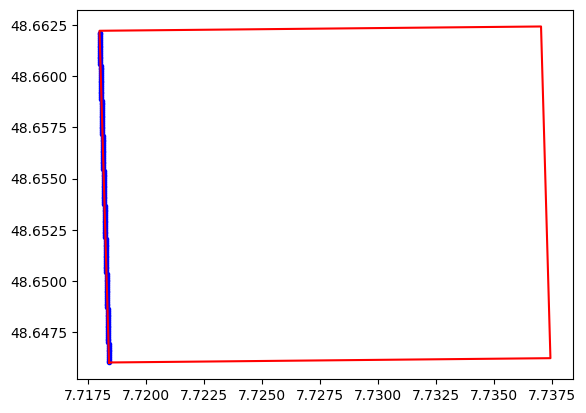

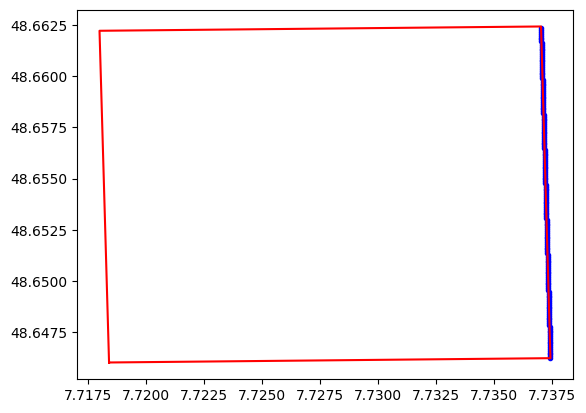

In [14]:
y, a, x, b = calcul_droite(coords[0],coords[3])
tabb = calcul_point_droite(a, x, b, coords[0], coords[3], 180)
print_fig(tabb)

y, a, x, b = calcul_droite(coords[1],coords[2])
tabb = calcul_point_droite(a, x, b, coords[1], coords[2], 180)
print_fig(tabb)


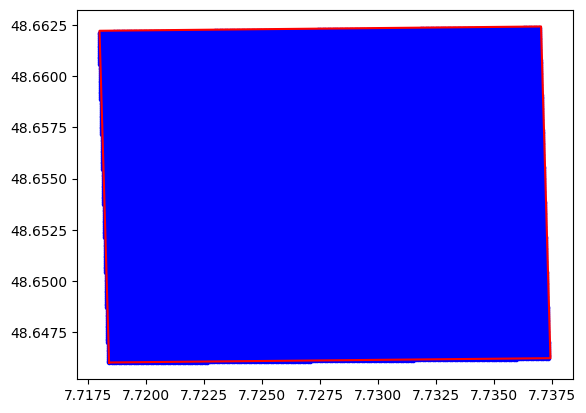

In [15]:
y, a, x, b = calcul_droite(coords[0],coords[3])
tabb1 = calcul_point_droite(a, x, b, coords[0], coords[3], 180)


y, a, x, b = calcul_droite(coords[1],coords[2])
tabb2 = calcul_point_droite(a, x, b, coords[1], coords[2], 180)

big_tab = []

for i in range(len(tabb1)):
    y, a, x, b = calcul_droite(tabb1[i],tabb2[i])
    tabbx = calcul_point_droite(a, x, b, tabb1[i], tabb2[i], 180)
    big_tab.append(tabbx)

big_print_fig(big_tab)
    

In [16]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point

In [17]:
import pandas as pd
import json
df = pd.read_json("plu_decoupage.json")

In [18]:
df['coordinates'] = df['geo_shape'].apply(lambda x: x['geometry']['coordinates'])
print(df[['geo_shape', 'coordinates']])

                                             geo_shape  \
0    {'type': 'Feature', 'geometry': {'coordinates'...   
1    {'type': 'Feature', 'geometry': {'coordinates'...   
2    {'type': 'Feature', 'geometry': {'coordinates'...   
3    {'type': 'Feature', 'geometry': {'coordinates'...   
4    {'type': 'Feature', 'geometry': {'coordinates'...   
..                                                 ...   
104  {'type': 'Feature', 'geometry': {'coordinates'...   
105  {'type': 'Feature', 'geometry': {'coordinates'...   
106  {'type': 'Feature', 'geometry': {'coordinates'...   
107  {'type': 'Feature', 'geometry': {'coordinates'...   
108  {'type': 'Feature', 'geometry': {'coordinates'...   

                                           coordinates  
0    [[[7.6384446509075286, 48.540206296469215], [7...  
1    [[[7.784382196232344, 48.5342768902335], [7.81...  
2    [[[7.671534470276169, 48.5251839364802], [7.70...  
3    [[[7.566965592015147, 48.5551220386937], [7.59...  
4    [[[7.59784046

In [57]:
big_tab[8][6]

(7.719027907666756, 48.64675295997475)

In [61]:
tab_to_keep = []

4 9
5 59


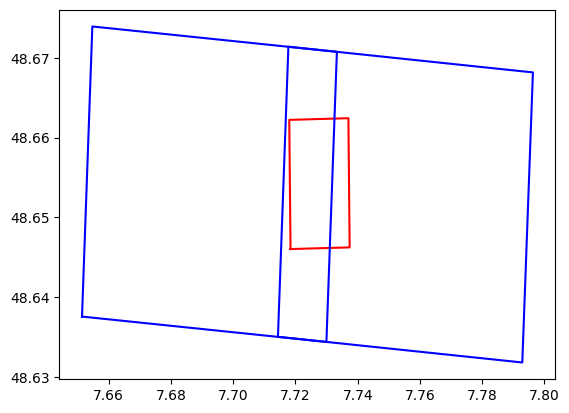

In [91]:
df_5000 = df.loc[df['echelle'] == '1/5000']
fig, ax = plt.subplots()
coords = extract_coordinates(kml_file)
polygon_image = Polygon(coords)
ax.plot(*polygon_image.exterior.xy, color='red')

for i in df_5000.index:
    liste_coords = df["coordinates"][i]
    liste_coords = liste_coords[0]
    # test si ce polygone contient un ensemble avec notre image
    polygon_temp = Polygon(liste_coords)
    
    x = polygon_temp.intersection(polygon_image)
    if(x):
        ax.plot(*polygon_temp.exterior.xy, color='blue')
        print(df_5000["num_planche"][i],i)
        #créer les zones ici
        tab_to_keep.append(liste_coords)
        

for j in big_tab :
    for i in j:
        point = Point(i[0], i[1])
        # ax.plot(point.x, point.y, marker='.', color='green')
plt.show()

In [102]:
def ici(tab_coord_test, coord_zone):
    for i in tab_coord_test:
        print(i, i[0], i[1])
        pt1 = Point(big_tab[i[0]][i[1]][0],big_tab[i[0]][i[1]][1])
        p2 = Polygon(coord_zone)
        print(p2)
        if pt1.covered_by(p2):
            return True
    return False

In [103]:
tab_to_keep[0]

[[7.651393194121161, 48.63756529609925],
 [7.729943124671662, 48.634393878843355],
 [7.73331459643316, 48.67074594833893],
 [7.654708950620465, 48.67391958032298],
 [7.651393194121161, 48.63756529609925]]

In [104]:
coord_test = [[178, 179],[179, 116],[179, 117],[179, 118],[179, 119]]
ici(coord_test, tab_to_keep[0])

[178, 179] 178 179
POLYGON ((7.651393194121161 48.63756529609925, 7.729943124671662 48.634393878843355, 7.73331459643316 48.67074594833893, 7.654708950620465 48.67391958032298, 7.651393194121161 48.63756529609925))
[179, 116] 179 116
POLYGON ((7.651393194121161 48.63756529609925, 7.729943124671662 48.634393878843355, 7.73331459643316 48.67074594833893, 7.654708950620465 48.67391958032298, 7.651393194121161 48.63756529609925))
[179, 117] 179 117
POLYGON ((7.651393194121161 48.63756529609925, 7.729943124671662 48.634393878843355, 7.73331459643316 48.67074594833893, 7.654708950620465 48.67391958032298, 7.651393194121161 48.63756529609925))
[179, 118] 179 118
POLYGON ((7.651393194121161 48.63756529609925, 7.729943124671662 48.634393878843355, 7.73331459643316 48.67074594833893, 7.654708950620465 48.67391958032298, 7.651393194121161 48.63756529609925))
[179, 119] 179 119
POLYGON ((7.651393194121161 48.63756529609925, 7.729943124671662 48.634393878843355, 7.73331459643316 48.67074594833893, 

False

tester pour chaque objet si il appartient a la zone en question